In [1]:
from sclibrary.network_reader import NetworkReader
from sclibrary.simplicial_complex import SimplicialComplexNetwork
from sclibrary.eigendecomposition import get_harmonic_eigenvectors, get_curl_eigenvectors

data_folder = 'data/sample_data'

# read csv
filename = data_folder + '/edges.csv'
delimeter = " "
src_col = 'Source'
dest_col = 'Target'
feature_cols = ['Distance']

G = NetworkReader.read_csv(filename=filename, delimeter=delimeter, src_col=src_col, dest_col=dest_col, feature_cols=feature_cols)
simplices = G.simplicies(condition="distance", dist_col_name="Distance", dist_threshold=1.5)

# if coordinates exist
filename = data_folder + '/coordinates.csv'
coordinates = NetworkReader.get_coordinates(filename=filename, 
                                            node_id_col="Id", 
                                            x_col='X', 
                                            y_col='Y', 
                                            delimeter=" ")

# create sc
sc = SimplicialComplexNetwork(simplices=simplices)

# eigendecomposition
k = 1
L1 = sc.hodge_laplacian_matrix(rank=k)
L1U = sc.upper_laplacian_matrix(rank=k)
u_h, eigenvals_h = get_harmonic_eigenvectors(L1)
u_c, eigenvals_c = get_curl_eigenvectors(L1U)

# get edge labels
edge_labels = {}
for i in range(len(sc.edges)):
    edge_labels[sc.edges[i][0], sc.edges[i][1]] = round(u_c[i][0], 2)

Text(0.5, 1.0, 'u_h, λ = 2.0')

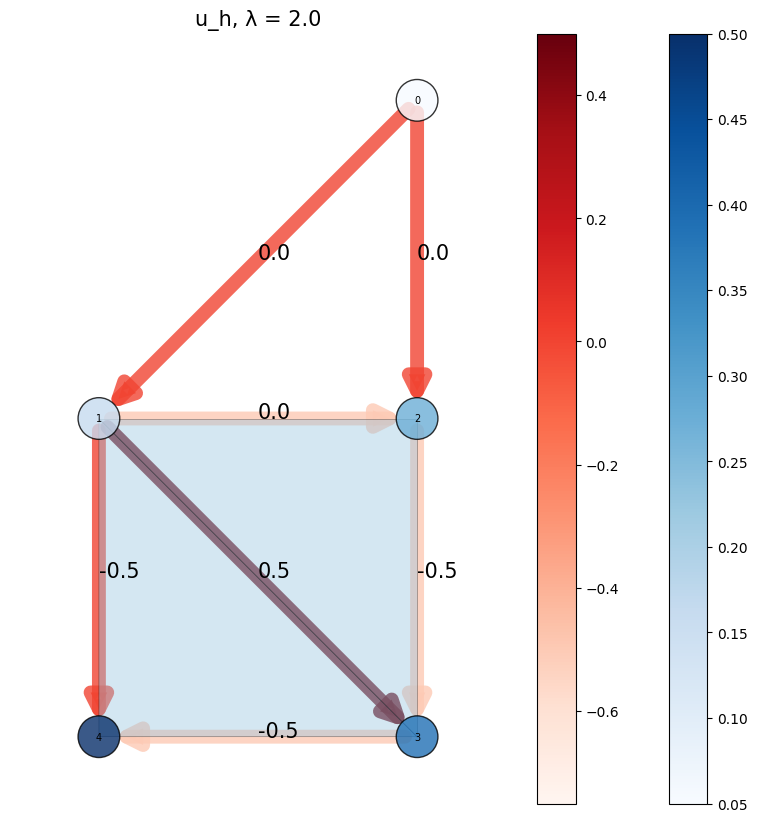

In [2]:

from sclibrary.plot import SCPlot
from matplotlib import pyplot as plt

# create plot
fig, _ = plt.subplots(figsize=(10, 10))
scplot = SCPlot(sc=sc, pos=coordinates)

sample_node_values = [0.1, 0.2, 0.3, 0.4, 0.5]

# plot nodes and edges
scplot.draw_sc_nodes(node_size=900, node_color=sample_node_values)

scplot.draw_sc_edges(directed=True, 
                     edge_width=10,
                     arrowsize=30, 
                     edge_color=list(edge_labels.values()),
                     )


# plot labels
scplot.draw_node_labels(font_size=7)
scplot.draw_edge_labels(edge_labels=edge_labels, font_size=15)

plt.title("u_h, λ = " + str(eigenvals_c[0]), fontsize=15)

In [5]:
from sclibrary.network_reader import NetworkReader
from sclibrary.simplicial_complex import SimplicialComplexNetwork
from sclibrary.eigendecomposition import (get_harmonic_eigenvectors, 
                                          get_curl_eigenvectors, 
                                          get_gradient_eigenvectors)

data_folder = "data/london_street"

# read csv
filename = data_folder + '/LondonEdges.csv'
delimeter = " "
src_col = 'Source'
dest_col = 'Target'
feature_cols = ['distance']


G = NetworkReader.read_csv(filename=filename, delimeter=delimeter, 
                           src_col=src_col, dest_col=dest_col, 
                           feature_cols=feature_cols)
simplices = G.simplicies(condition="all")


filename = data_folder + '/LondonNodes.csv'
coordinates = NetworkReader.get_coordinates(filename=filename, 
                                            node_id_col="Id", 
                                            x_col='X', 
                                            y_col='Y', 
                                            delimeter=",")

# create sc
sc = SimplicialComplexNetwork(simplices=simplices)

# eigendecomposition
k = 1
L1 = sc.hodge_laplacian_matrix(rank=k)
L1U = sc.upper_laplacian_matrix(rank=k)
L1L = sc.lower_laplacian_matrix(rank=k)
u_h, eigenvals_h = get_harmonic_eigenvectors(L1)
u_c, eigenvals_c = get_curl_eigenvectors(L1U)
u_g, eigenvals_g = get_gradient_eigenvectors(L1L)

# get edge labels
edge_labels = {}
for i in range(len(sc.edges)):
    edge_labels[sc.edges[i][0], sc.edges[i][1]] = round(float(u_g[i][0]), 2)

/var/folders/py/wfd5gjj55nx4cqtdvltb22mw0000gp/T/ipykernel_37640/4194019847.py:45: ComplexWarning: Casting complex values to real discards the imaginary part
  edge_labels[sc.edges[i][0], sc.edges[i][1]] = round(float(u_g[i][0]), 2)


/var/folders/py/wfd5gjj55nx4cqtdvltb22mw0000gp/T/ipykernel_37640/2472082529.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.title("u_h, λ = " + str(round(float(eigenvals_g[0]), 2)), fontsize=40)


Text(0.5, 1.0, 'u_h, λ = 7.68')

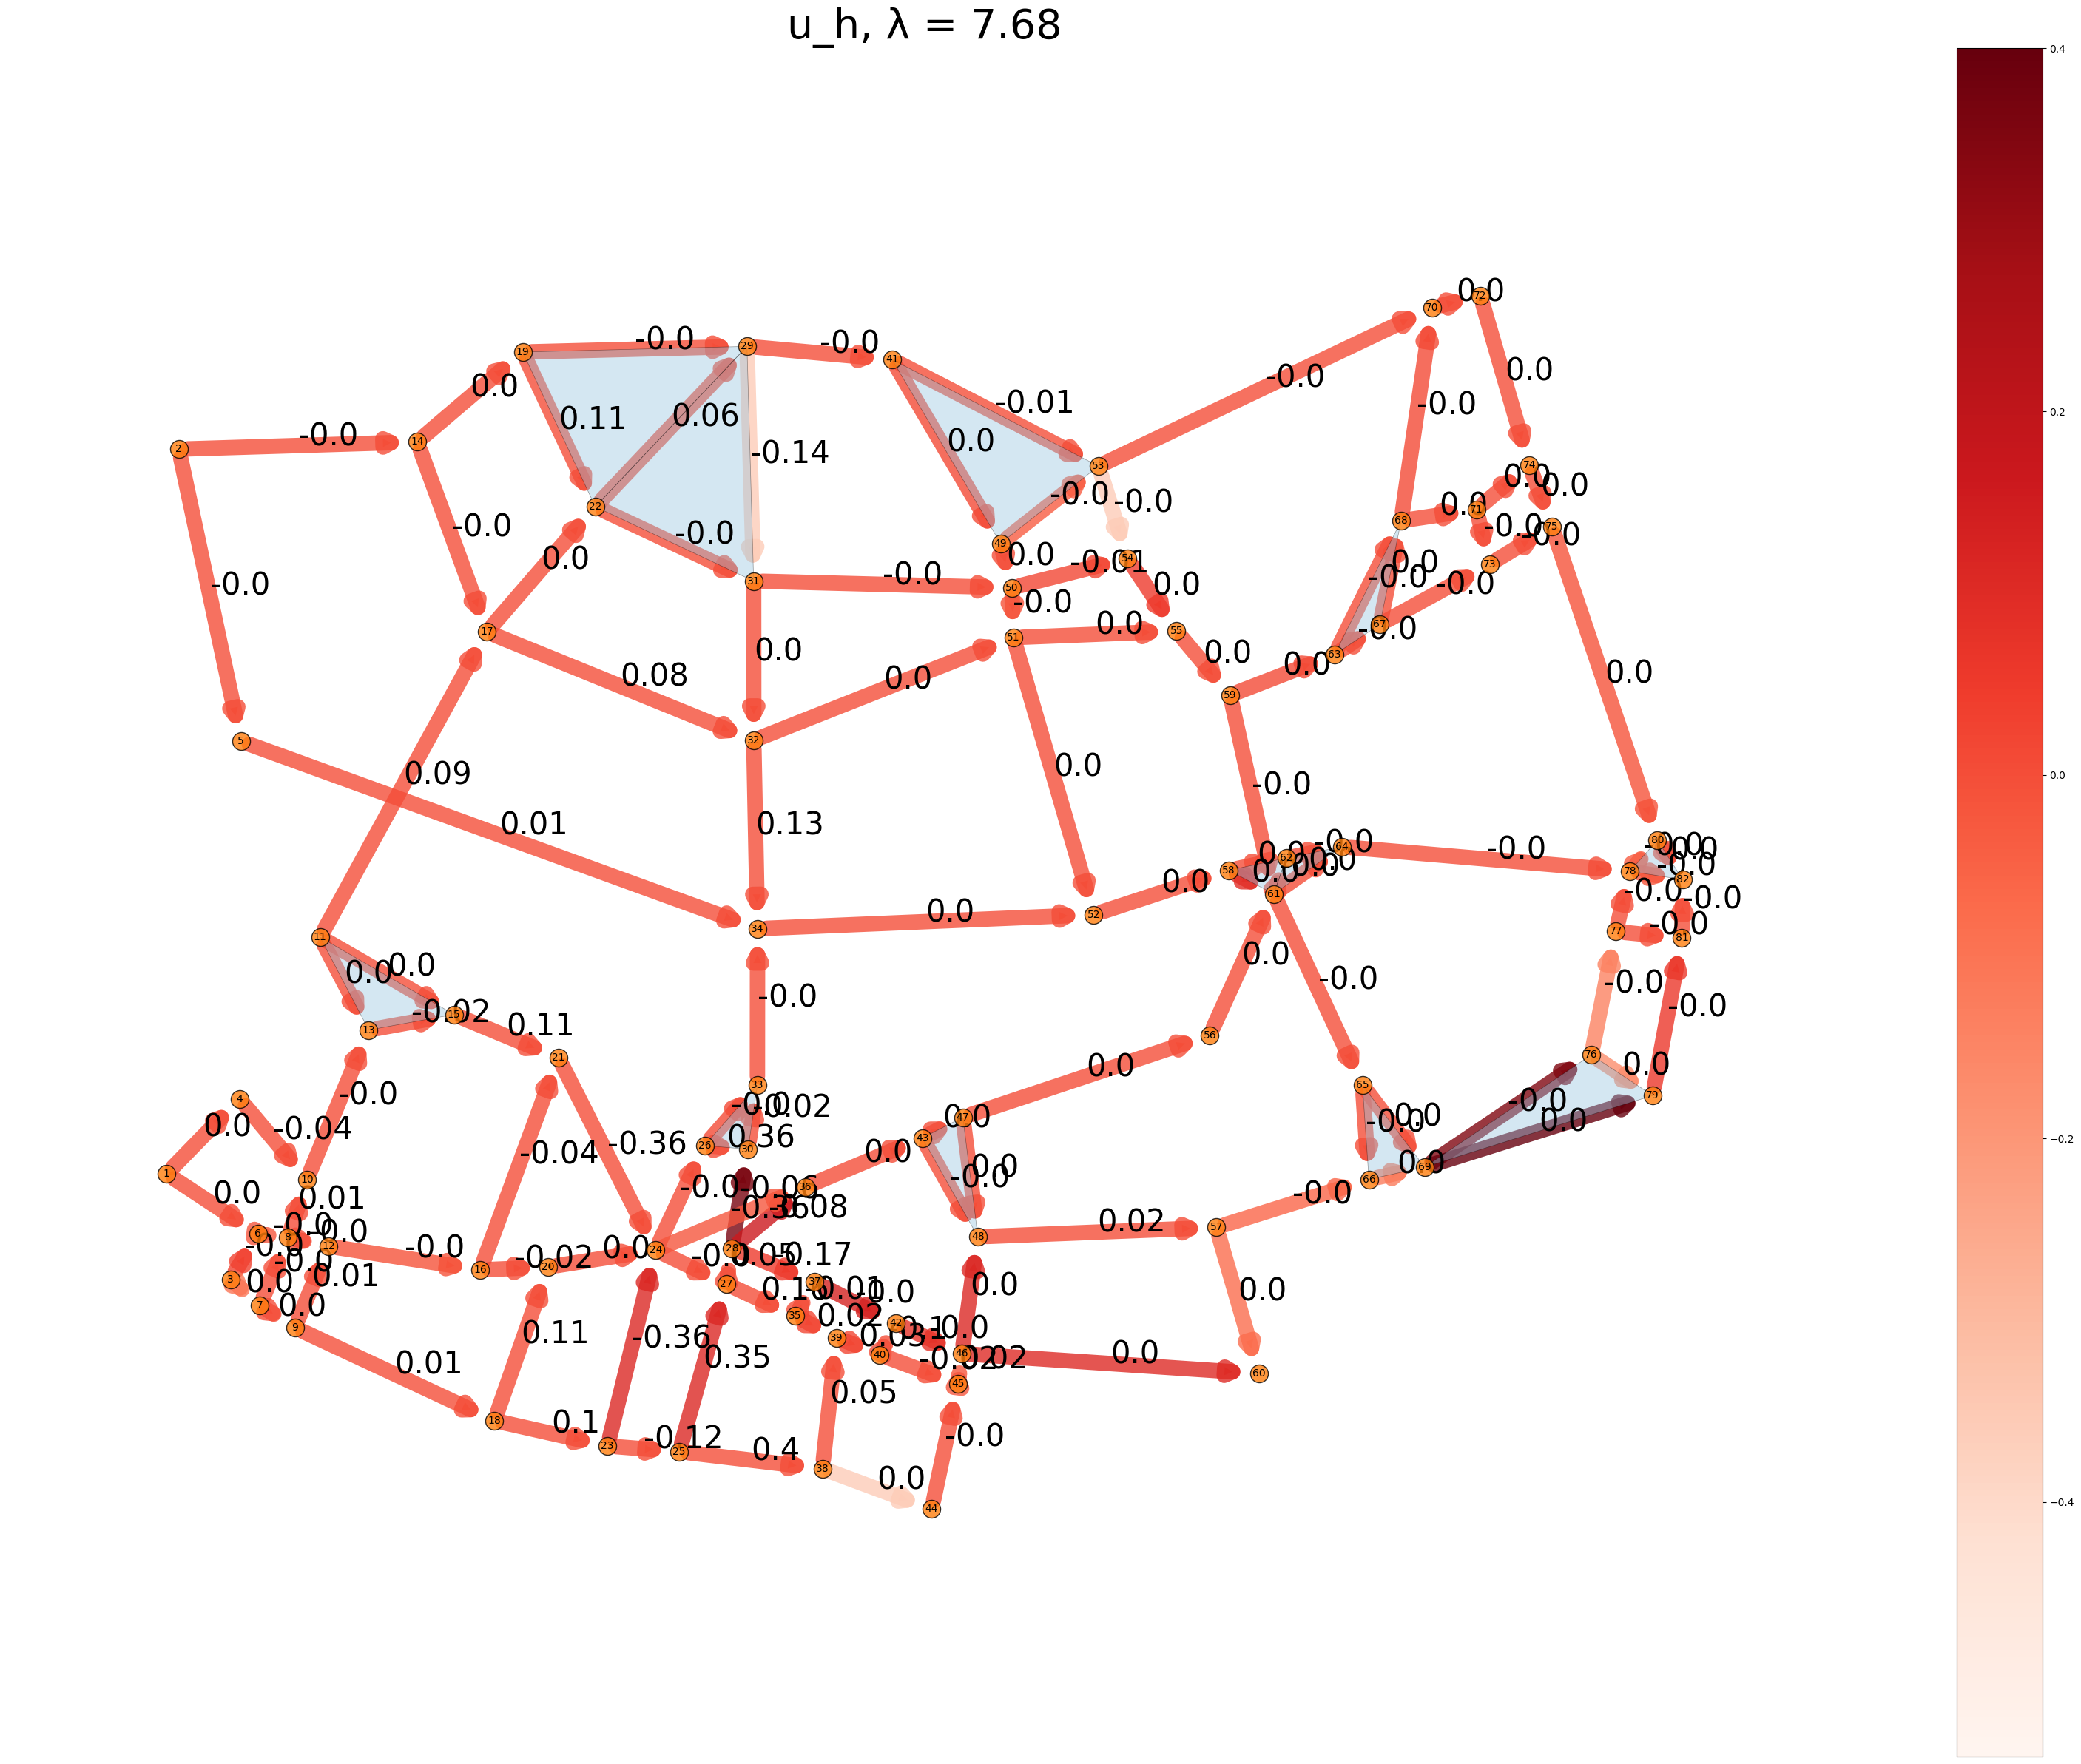

In [9]:
from sclibrary.plot import SCPlot
from matplotlib import pyplot as plt

# create plot
fig, ax = plt.subplots(figsize=(40, 30))
scplot = SCPlot(sc=sc, pos=coordinates)

# plot nodes and edges
scplot.draw_sc_nodes(ax=ax)
scplot.draw_sc_edges(directed=True,
                     edge_color=list(edge_labels.values()),
                     edge_width=15,
                     arrowsize=20,
                     ax=ax)

# plot labels
scplot.draw_node_labels(font_size=10)
scplot.draw_edge_labels(edge_labels=edge_labels, font_size=30)

plt.title("u_h, λ = " + str(round(float(eigenvals_g[0]), 2)), fontsize=40)